In [1]:
import pandas as pd

# 원본 데이터 불러오기
df = pd.read_csv("weather_all_data_cleaned.csv", encoding="euc-kr")

# 유지할 컬럼 리스트
columns_to_keep = [
    "일시", "평균기온(°C)", "최저기온(°C)", "최고기온(°C)", "일강수량(mm)",
    "최대 순간 풍속(m/s)", "최대 풍속(m/s)", "평균 풍속(m/s)", "최소 상대습도(%)",
    "평균 증기압(hPa)", "평균 현지기압(hPa)", "최저 해면기압(hPa)",
    "일 최심신적설(cm)", "평균 지면온도(°C)", "지점명"
]

# 컬럼 필터링
df_filtered = df[columns_to_keep]

# 결과 확인
print(df_filtered.head())

df_filtered.to_csv("filltered_data.csv", index=False, encoding="utf-8-sig")


           일시  평균기온(°C)  최저기온(°C)  최고기온(°C)  일강수량(mm)  최대 순간 풍속(m/s)  \
0  2015-01-01       3.3       1.7       5.4       4.2           21.2   
1  2015-01-02       6.1       3.9       8.5       0.0           16.8   
2  2015-01-03       6.8       3.5       9.6       0.0            6.0   
3  2015-01-04      11.5       7.7      15.0       0.0            7.0   
4  2015-01-05      12.9       6.8      17.5       0.7           13.4   

   최대 풍속(m/s)  평균 풍속(m/s)  최소 상대습도(%)  평균 증기압(hPa)  평균 현지기압(hPa)  \
0        12.9         8.3        46.0          5.4        1022.9   
1         9.7         6.3        42.0          5.0        1023.8   
2         3.7         2.1        53.0          6.1        1021.3   
3         4.3         2.8        54.0          8.8        1016.1   
4         7.2         2.2        35.0          9.2        1013.2   

   최저 해면기압(hPa)  일 최심신적설(cm)  평균 지면온도(°C) 지점명  
0        1022.6          1.8          2.4  제주  
1        1024.2          0.0          3.6  제주  
2        1019.

In [2]:
import pandas as pd

df_filtered = pd.read_csv("./weather_all_data_cleaned.csv", encoding="euc-kr")

columns_to_keep = [
    "일시", "평균기온(°C)", "최저기온(°C)", "최고기온(°C)", "일강수량(mm)",
    "최대 순간 풍속(m/s)", "최대 풍속(m/s)", "평균 풍속(m/s)", "최소 상대습도(%)",
    "평균 증기압(hPa)", "평균 현지기압(hPa)", "최저 해면기압(hPa)",
    "일 최심신적설(cm)", "평균 지면온도(°C)", "지점명"
]
df_filtered = df_filtered[columns_to_keep]

df_2026 = pd.read_csv("./2026_지점별_예측_통합.csv", encoding="ISO-8859-1")
df_2026.columns = columns_to_keep  # 동일한 컬럼으로 재정의

df_filtered["일시"] = pd.to_datetime(df_filtered["일시"])
df_2026["일시"] = pd.to_datetime(df_2026["일시"])

merged_df = pd.concat([df_filtered, df_2026], ignore_index=True)

merged_df.to_csv("./통합_날씨데이터_2015_2026.csv", index=False, encoding="utf-8-sig")

# 미리보기
merged_df.head()


,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),최저 해면기압(hPa),일 최심신적설(cm),평균 지면온도(°C),지점명
0,2015-01-01,3.3,1.7,5.4,4.2,21.2,12.9,8.3,46.0,5.4,1022.9,1022.6,1.8,2.4,제주
1,2015-01-02,6.1,3.9,8.5,0.0,16.8,9.7,6.3,42.0,5.0,1023.8,1024.2,0.0,3.6,제주
2,2015-01-03,6.8,3.5,9.6,0.0,6.0,3.7,2.1,53.0,6.1,1021.3,1019.5,0.0,5.3,제주
3,2015-01-04,11.5,7.7,15.0,0.0,7.0,4.3,2.8,54.0,8.8,1016.1,1017.2,0.0,7.3,제주
4,2015-01-05,12.9,6.8,17.5,0.7,13.4,7.2,2.2,35.0,9.2,1013.2,1009.3,0.0,8.8,제주


In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df = pd.read_csv("./data_for_predict.csv", encoding="euc-kr")
df["일시"] = pd.to_datetime(df["일시"])
df["연도"] = df["일시"].dt.year

target_col = "평균 이슬점온도(°C)"
feature_cols = df.columns.difference(["일시", "지점명", "연도", target_col])

# 📌 2. 학습/테스트 분리 (23~24년 → test, 나머지 → train)
train_df = df[df["연도"] < 2023].dropna()
test_df = df[df["연도"].isin([2023, 2024])].dropna()

X_train = train_df[feature_cols]
y_train = train_df[target_col]
X_test = test_df[feature_cols]
y_test = test_df[target_col]

# 📌 3. 여러 모델 학습 및 평가
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Ridge": Ridge(alpha=1.0)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    elif hasattr(model, "coef_"):
        importance = np.abs(model.coef_)
    else:
        importance = np.zeros(len(feature_cols))

    results.append({
        "model": name,
        "mae": mae,
        "rmse": rmse,
        "r2": r2,
        "feature_importance": dict(zip(feature_cols, importance))
    })

results


[{'model': 'RandomForest',
  'mae': 0.09978492476060226,
  'rmse': 0.1640094897120137,
  'r2': 0.9996651487745903,
  'feature_importance': {'최고기온(°C)': 6.319593486155303e-05,
   '최대 순간 풍속(m/s)': 3.134263589958855e-05,
   '최대 풍속(m/s)': 2.189466229222766e-05,
   '최저기온(°C)': 5.261206535058348e-05,
   '평균 증기압(hPa)': 0.9996941117260981,
   '평균 지면온도(°C)': 3.936578212493449e-05,
   '평균 풍속(m/s)': 2.4125651771393557e-05,
   '평균 현지기압(hPa)': 3.9049458987928893e-05,
   '평균기온(°C)': 3.430208261359669e-05}},
 {'model': 'GradientBoosting',
  'mae': 0.10489664855462304,
  'rmse': 0.16030333039873565,
  'r2': 0.9996801112048292,
  'feature_importance': {'최고기온(°C)': 3.027157530793101e-05,
   '최대 순간 풍속(m/s)': 6.788134148749851e-06,
   '최대 풍속(m/s)': 5.037332467109077e-07,
   '최저기온(°C)': 2.0361604783598368e-05,
   '평균 증기압(hPa)': 0.9999282326430392,
   '평균 지면온도(°C)': 1.3225990752639098e-06,
   '평균 풍속(m/s)': 3.2616882210929923e-06,
   '평균 현지기압(hPa)': 4.2704288830620135e-06,
   '평균기온(°C)': 4.9875932944620174e-

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 추가 모델 포함 및 하이퍼파라미터 튜닝용 설정
model_configs = {
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.1, 1.0, 10.0]
        }
    },
    "SVR": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("svr", SVR())
        ]),
        "params": {
            "svr__C": [1.0, 10.0],
            "svr__epsilon": [0.1, 0.2]
        }
    },
    "KNeighbors": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("knn", KNeighborsRegressor())
        ]),
        "params": {
            "knn__n_neighbors": [3, 5, 7],
            "knn__weights": ["uniform", "distance"]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    }
}

# 결과 저장용 리스트
tuned_results = []

# 각 모델에 대해 GridSearchCV 수행
for name, cfg in model_configs.items():
    gs = GridSearchCV(cfg["model"], cfg["params"], cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
    gs.fit(X_train, y_train)
    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    tuned_results.append({
        "model": name,
        "best_params": gs.best_params_,
        "mae": mae,
        "rmse": rmse,
        "r2": r2
    })

tuned_results


NameError: name 'RandomForestRegressor' is not defined

In [1]:
# 과접합 확인 => 차이가 너무 크면 과접합
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print("Train R²:", train_r2)
print("Test  R²:", test_r2)

NameError: name 'model' is not defined

In [9]:
from sklearn.model_selection import cross_val_score

# 예: GradientBoosting 최적 모델을 사용
from sklearn.ensemble import GradientBoostingRegressor

best_model = GradientBoostingRegressor(
    learning_rate=0.05, max_depth=5, n_estimators=200, random_state=42
)

scores = cross_val_score(best_model, X_train, y_train, scoring='r2', cv=5)
print("CV 평균 R²:", np.mean(scores))
print("CV 분산:", np.std(scores))


CV 평균 R²: 0.9997303197447642
CV 분산: 6.24987762765259e-05


In [10]:
#과접합 plot

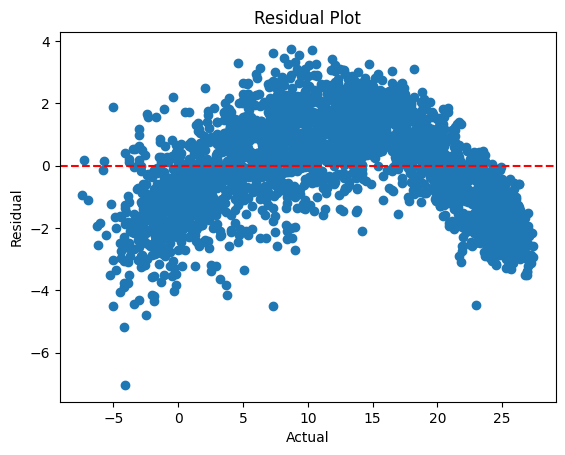

In [11]:
import matplotlib.pyplot as plt

residuals = y_test - test_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

In [20]:
# 필요한 라이브러리 재로드
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 데이터 재로드
df = pd.read_csv("./data_for_predict.csv", encoding="euc-kr")
df["일시"] = pd.to_datetime(df["일시"])
df["연도"] = df["일시"].dt.year

target_col = "평균 이슬점온도(°C)"
feature_cols = df.columns.difference(["일시", "지점명", "연도", target_col])

train_df = df[df["연도"] < 2023].dropna()
test_df = df[df["연도"].isin([2023, 2024])].dropna()

X_train = train_df[feature_cols]
y_train = train_df[target_col]
X_test = test_df[feature_cols]
y_test = test_df[target_col]

# 모델 및 하이퍼파라미터 설정
model_configs = {
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        }
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.1, 1.0, 10.0]
        }
    },
    "SVR": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("svr", SVR())
        ]),
        "params": {
            "svr__C": [1.0, 10.0],
            "svr__epsilon": [0.1, 0.2]
        }
    },
    "KNeighbors": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("knn", KNeighborsRegressor())
        ]),
        "params": {
            "knn__n_neighbors": [3, 5, 7],
            "knn__weights": ["uniform", "distance"]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    }
}

# 결과 저장
tuned_results = []

for name, cfg in model_configs.items():
    gs = GridSearchCV(cfg["model"], cfg["params"], cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
    gs.fit(X_train, y_train)
    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    if hasattr(best_model, "feature_importances_"):
        importances = best_model.feature_importances_
        importance_dict = dict(zip(feature_cols, importances))
    elif hasattr(best_model, "coef_"):
        importances = np.abs(best_model.coef_)
        importance_dict = dict(zip(feature_cols, importances))
    else:
        importance_dict = {}

    tuned_results.append({
        "model": name,
        "best_params": gs.best_params_,
        "mae": mae,
        "rmse": rmse,
        "r2": r2,
        "feature_importance": importance_dict
    })

# 모델 성능 요약만 추출
summary = []
for result in tuned_results:
    summary.append({
        "Model": result["model"],
        "Best Params": result["best_params"],
        "MAE": result["mae"],
        "RMSE": result["rmse"],
        "R2 Score": result["r2"],
        "importance_feature" : result["feature_importance"]
    })

summary_df = pd.DataFrame(summary)

print(summary_df)

              Model                                        Best Params  \
0      RandomForest  {'max_depth': 10, 'min_samples_split': 2, 'n_e...   
1  GradientBoosting  {'learning_rate': 0.05, 'max_depth': 5, 'n_est...   
2             Ridge                                    {'alpha': 10.0}   
3               SVR              {'svr__C': 10.0, 'svr__epsilon': 0.1}   
4        KNeighbors  {'knn__n_neighbors': 7, 'knn__weights': 'dista...   
5      DecisionTree          {'max_depth': 10, 'min_samples_split': 5}   

        MAE      RMSE  R2 Score  \
0  0.098204  0.162394  0.999672   
1  0.089279  0.149089  0.999723   
2  1.261326  1.518375  0.971301   
3  0.121240  0.230599  0.999338   
4  0.818835  1.155519  0.983379   
5  0.109956  0.197718  0.999513   

                                  importance_feature  
0  {'최고기온(°C)': 4.9983850646069804e-05, '최대 순간 풍속...  
1  {'최고기온(°C)': 4.833369664075165e-05, '최대 순간 풍속(...  
2  {'최고기온(°C)': 0.0884978464062957, '최대 순간 풍속(m/s...  
3              

In [23]:
summary_df.to_csv("./모델_성능_요약.csv", index=False, encoding="utf-8-sig")